In [2]:
import ROOT as r
#import ROOT.RooFit as rf
import awkward as ak
import numpy as np

Welcome to JupyROOT 6.28/04


In [2]:
signal = ak.from_parquet("GGH_125_2017UL.parquet")
data = ak.from_parquet("data_2017ULF.parquet")
processed = ak.from_parquet("prediction_data.parquet")

In [3]:
mass_sig = signal.mass
score = processed.score
mass_data = data.mass

In [4]:
use_sig = mass_sig[((mass_sig>=100) & (mass_sig<=150))]
use_data = mass_data[((mass_data<=115)|(mass_data>=135))]

In [5]:
c1 = r.TCanvas('c1',"masses",800,800)

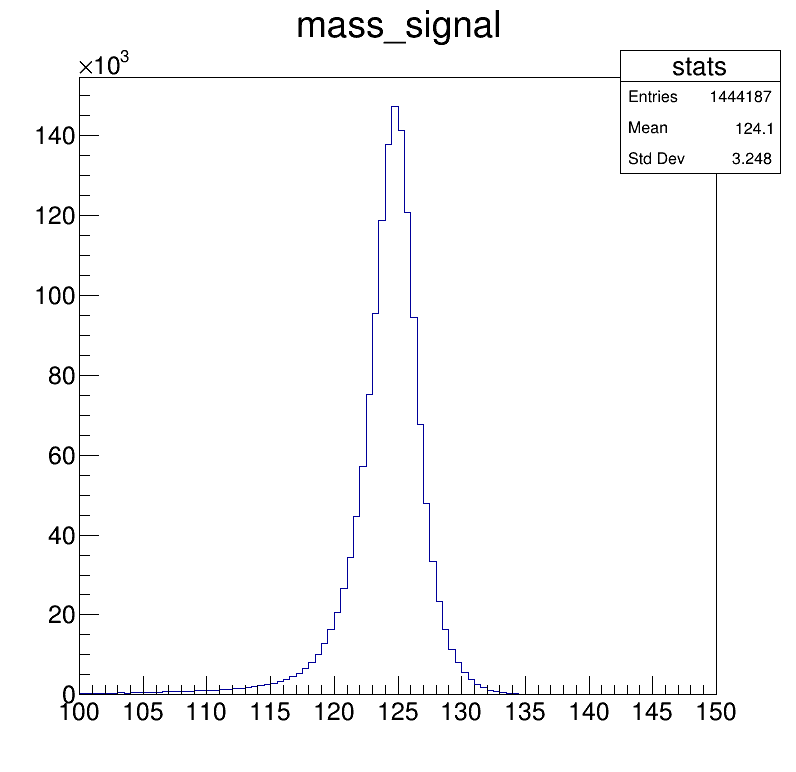

In [6]:
h1 = r.TH1F("stats","mass_signal",100,100,150)
for i in range(len(use_sig)):
    h1.Fill(use_sig[i])
#h1.Scale(1.0 / h1.Integral())
h1.Draw()
c1.Draw()

In [7]:
use_data

<Array [98.9, 99.8, 103, 97.5, ..., 95.9, 103, 97.3] type='871514 * ?float32'>

Warning in <TROOT::Append>: Replacing existing TH1: stats (Potential memory leak).


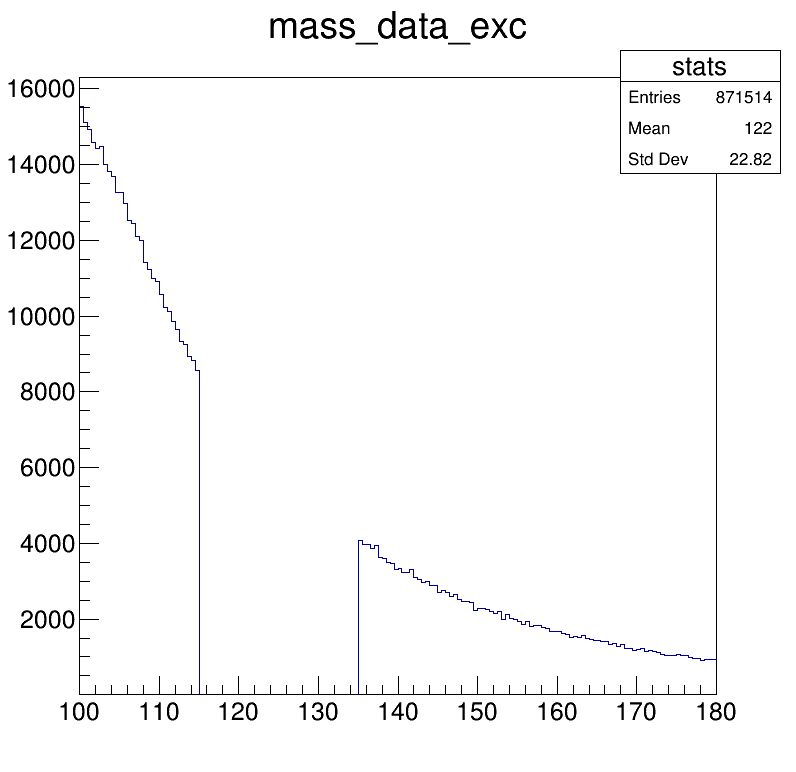

In [8]:
h2 = r.TH1F("stats","mass_data_exc",160,100,180)
for i in range(len(use_data)):
    h2.Fill(use_data[i])
h2.SetMinimum(0.1)
h2.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: stats (Potential memory leak).


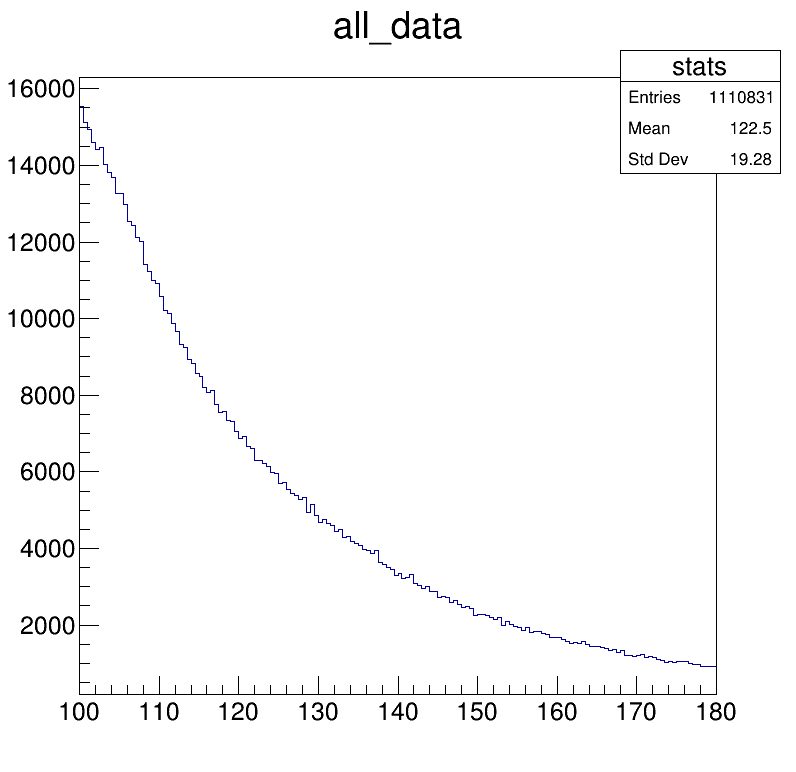

In [9]:
h3 = r.TH1F("stats","all_data",160,100,180)
for i in range(len(mass_data)):
    h3.Fill(mass_data[i])
h3.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: stats (Potential memory leak).


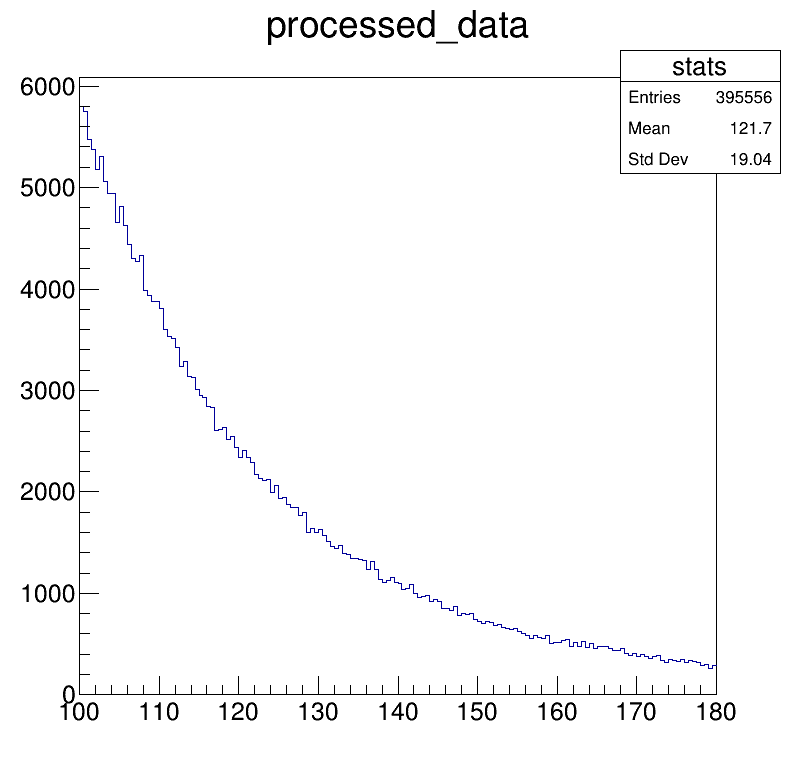

In [10]:
h4 = r.TH1F("stats","processed_data",160,100,180)
mass_use = mass_data[score>0.8]
for i in range(len(mass_use)):
    h4.Fill(mass_use[i])
h4.Draw()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: stats (Potential memory leak).


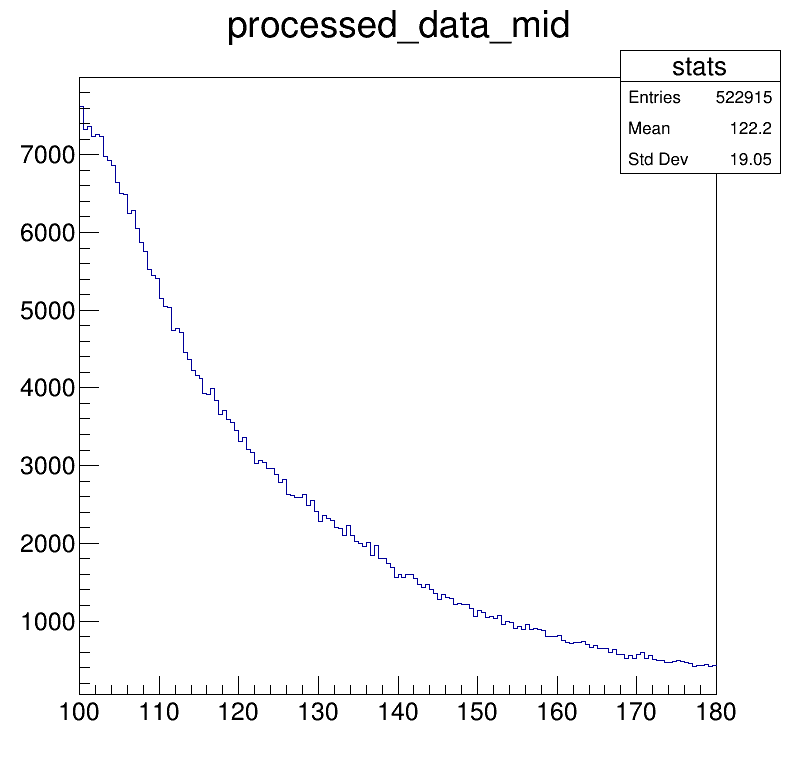

In [11]:
h5 = r.TH1F("stats","processed_data_mid",160,100,180)
mass_use = mass_data[(score>0.4)&(score<0.8)]
for i in range(len(mass_use)):
    h5.Fill(mass_use[i])
h5.Draw()
c1.Draw()

In [12]:
histfile = r.TFile.Open("histfile.root","recreate")

In [13]:
histfile.WriteObject(h1,"histogram1")
histfile.WriteObject(h2,"histogram2")
histfile.WriteObject(h3,"histogram3")
histfile.WriteObject(h4,"best")
histfile.WriteObject(h5,"mid")

1085

In [1]:
m1 = r.RooRealVar("m1","M_{{\gamma}{\gamma}}",100,150,"GeV")
m2 = r.RooRealVar("m2","M_{{\gamma}{\gamma}}",100,180,"GeV")
m3 = r.RooRealVar("m3","M_{{\gamma}{\gamma}}",100,180,"GeV")
m4 = r.RooRealVar("m3","M_{{\gamma}{\gamma}}",100,180,"GeV")
m5 = r.RooRealVar("m3","M_{{\gamma}{\gamma}}",100,180,"GeV")

NameError: name 'r' is not defined

In [4]:
inputfile = r.TFile("histfile.root","READ")
inputfile.ls()

TFile**		histfile.root	
 TFile*		histfile.root	
  KEY: TH1F	histogram1;1	mass_signal
  KEY: TH1F	histogram2;1	mass_data_exc
  KEY: TH1F	histogram3;1	all_data
  KEY: TH1F	best;1	processed_data
  KEY: TH1F	mid;1	processed_data_mid


Warning in <TFile::Init>: file histfile.root probably not closed, trying to recover
Info in <TFile::Recover>: histfile.root, recovered key TH1F:histogram1 at address 222
Info in <TFile::Recover>: histfile.root, recovered key TH1F:histogram2 at address 1150
Info in <TFile::Recover>: histfile.root, recovered key TH1F:histogram3 at address 2163
Info in <TFile::Recover>: histfile.root, recovered key TH1F:best at address 3262
Info in <TFile::Recover>: histfile.root, recovered key TH1F:mid at address 4315
Warning in <TFile::Init>: successfully recovered 5 keys


In [5]:
heg1 = inputfile.Get("histogram1")
heg2 = inputfile.Get("histogram2")
heg3 = inputfile.Get("histogram3")
heg4 = inputfile.Get("best")
heg5 = inputfile.Get("mid")

In [7]:
dh1 = r.RooDataHist("dh1","dh1",r.RooArgList(m1),r.RooFit.Import(heg1))
dh2 = r.RooDataHist("dh2","dh2",r.RooArgList(m2),r.RooFit.Import(heg2))
dh3 = r.RooDataHist("dh3","dh3",r.RooArgList(m3),r.RooFit.Import(heg3))
dh4 = r.RooDataHist("dh4","dh4",r.RooArgList(m4),r.RooFit.Import(heg4))
dh5 = r.RooDataHist("dh5","dh5",r.RooArgList(m5),r.RooFit.Import(heg5))


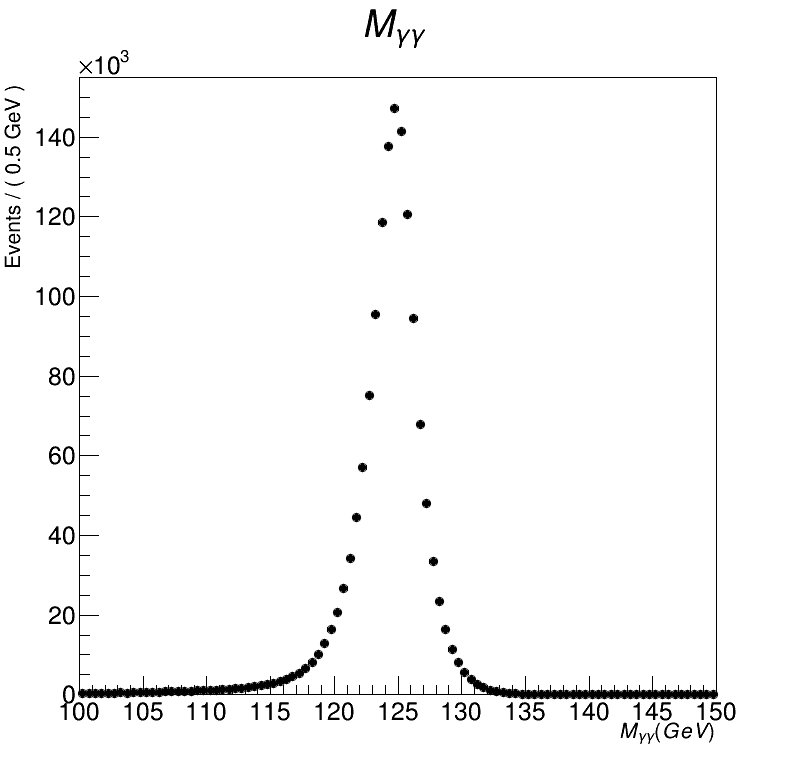

In [7]:
frame1 = m1.frame(r.RooFit.Title("M_{\gamma \gamma}"))
dh1.plotOn(frame1,r.RooFit.Name("dh1"))
c3 = r.TCanvas("c3","example",800,800)
frame1.GetXaxis().SetTitleSize(0.03)
frame1.GetYaxis().SetTitleSize(0.03)
frame1.Draw()
c3.Draw()

In [8]:
mBW = r.RooRealVar("mBW","mean BW",125,110,140)                                                              
sBW = r.RooRealVar("sBW","sigma BW",5,0.0,10)                                                            
brietwigner = r.RooBreitWigner("bw","bw",m1,mBW,sBW)                                                             
                                                                                                                
mCB = r.RooRealVar("mCB", "mCB" ,0.1,0.1,1.0)                                                                       
sCB = r.RooRealVar("sCB", "sCB" ,2.3 , 0.0, 5.0)                                                               
nCB = r.RooRealVar("nCB","nCB", 1,0.,5.0)                                                                        
#RooRealVar nCB("nCB","", 1.42,0.001,50)                                                                    
alphaCB = r.RooRealVar("alphaCB","", 0.93,0.1,5.0)                                                               
#RooRealVar alphaCB("alphaCB","", 0.93,0.1 , 50)                                                            
cball = r.RooCBShape("cball","cball",m1,mCB,sCB, alphaCB, nCB)
bwcball = r.RooFFTConvPdf("BWxcball","BW(X)cball",m1,brietwigner, cball)

[#1] INFO:Caching -- Changing internal binning of variable 'm1' in FFT 'BWxcball' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.


In [9]:
a1= bwcball.fitTo(dh1,r.RooFit.Save())

[#1] INFO:Eval -- RooRealVar::setRange(m1) new range named 'refrange_fft_BWxcball' created with bounds [100,150]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x62288c665400 with pdf bw_CONV_cball_CACHE_Obs[m1]_NORM_m1 for nset (m1) with code 0
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaCB      9.30000e-01  4.15000e-01    1.00000e-01  5.00000e+00
     2 mBW          1.25000e+02  3.00000e+00    1.10000e+02  1.40000e+02
     3 mCB          1.00000e-01  9.00000e-02    1.00000e-01  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSI

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x62288c895040 with pdf bw_CONV_cball_CACHE_Obs[m1]_NORM_m1 for nset (m1) with code 0


Info in <TCanvas::Print>: png file signal.png has been created


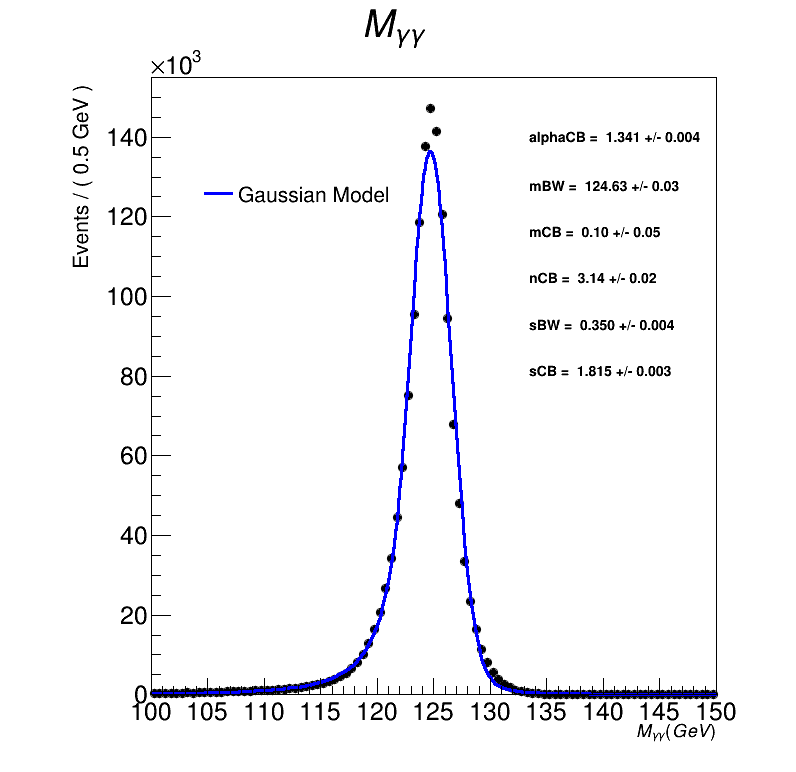

In [10]:
bwcball.plotOn(frame1,r.RooFit.Name("Gaussian_model"));

bwcball.paramOn(frame1, 
              r.RooFit.Layout(0.65,0.95,0.85),  
              r.RooFit.Format("NEU",r.RooFit.AutoPrecision(1)))
frame1.getAttText().SetTextSize(0.02);  
frame1.GetXaxis().SetTitleSize(0.025)
frame1.GetYaxis().SetTitleSize(0.03)
c5 = r.TCanvas("c5","Inv. Mass Hist.",800,800) ;                                                     
c5.cd();                                                                                                      
r.gPad.SetLeftMargin(0.19) ; frame1.GetYaxis().SetTitleOffset(1.8) ;                                          
r.gPad.SetRightMargin(0.10) ; frame1.GetXaxis().SetTitleOffset(1.2) ;
frame1.Draw(); 
legend5 = r.TLegend(0.25, 0.65, 0.45, 0.85)  # Adjust position as needed
# Add legend entries for each component
legend5.AddEntry(frame1.findObject("Gaussian_model"), "Gaussian Model", "l")
legend5.SetBorderSize(0)
legend5.SetFillColor(0)
legend5.SetTextSize(0.03)  # Adjust text size

# Draw the legend
legend5.Draw()

# Update and Save

c5.Draw()
c5.SaveAs("signal.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


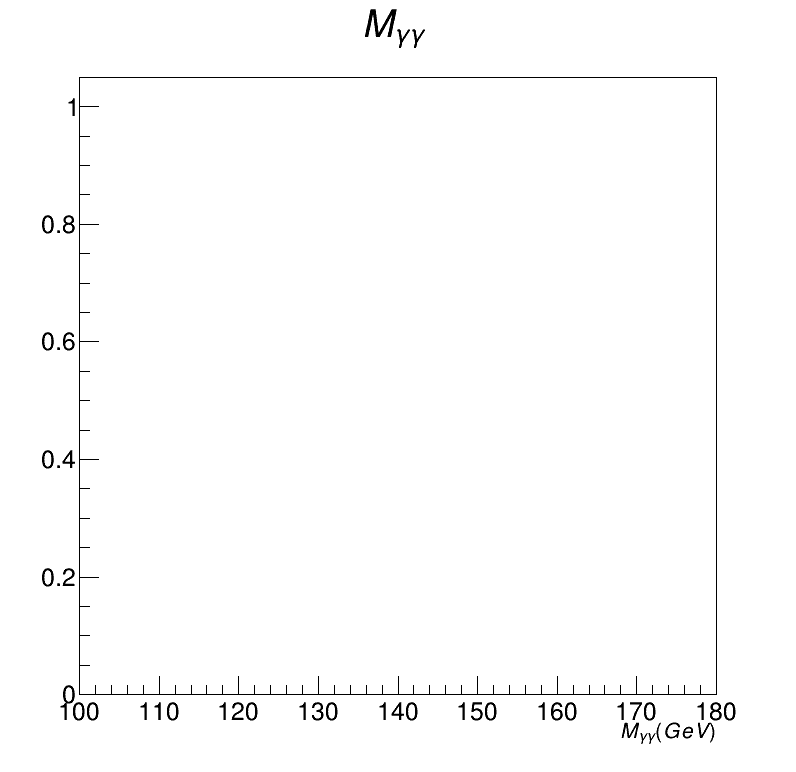

In [85]:
frame2 = m3.frame(r.RooFit.Title("M_{\gamma \gamma}"))
#dh3.plotOn(frame2,r.RooFit.Name("dh2"))
c4 = r.TCanvas("c4","example",800,800)
frame2.GetXaxis().SetTitleSize(0.03)
frame2.GetYaxis().SetTitleSize(0.03)
frame2.Draw()
c4.Draw()

In [86]:
lambd1 = r.RooRealVar("lambd1", "slope", -0.001, -10, 10) 
exp1 = r.RooExponential("expo1", "exponential PDF", m3, lambd1)
nbkg1 = r.RooRealVar("nbkg1","background events",1000000,200,8000000)
lambd2 = r.RooRealVar("lambd2", "slope", 1, -10, 10) 
exp2 = r.RooExponential("expo2", "exponential PDF", m3, lambd2)
nbkg2 = r.RooRealVar("nbkg2","background events",1000000,200,8000000)
bkg  =r.RooAddPdf("bkg", "Total bkg", r.RooArgList(exp1,exp2), r.RooArgList(nbkg1,nbkg2))


In [87]:
a1= bkg.fitTo(dh3, r.RooFit.Save())

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (expo1,expo2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 lambd1      -1.00000e-03  2.00000e+00   -1.00000e+01  1.00000e+01
     2 lambd2       1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 nbkg1        1.00000e+06  4.99900e+05    2.00000e+02  8.00000e+06
     4 nbkg2        1.00000e+06  4.99900e+05    2.00000e+02  8.00000e+06
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED A

[#0] ERROR:InputArguments -- RooDataHist::dh2:plotOn: dataset doesn't contain plot frame variable
[#0] ERROR:InputArguments -- RooPlot::findObject(frame_m1_62288b5bf4f0) cannot find object bkg


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file bkg.png has been created


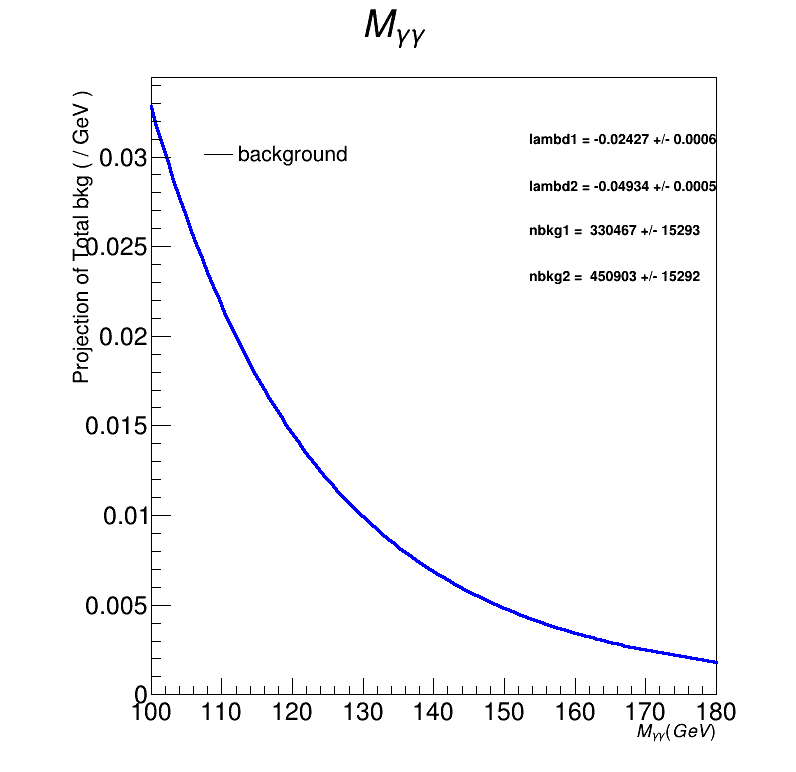

In [88]:
m3.setRange("blindRegion1",100,115)
m3.setRange("blindRegion2",135,180)
#dh3.plotOn(frame2, r.RooFit.Binning(160), r.RooFit.CutRange("blindRegion1"))
#dh3.plotOn(frame2, r.RooFit.Binning(160), r.RooFit.CutRange("blindRegion2"))
dh2.plotOn(frame2)
#dh3.plotOn(frame2,r.RooFit.Binning(160),r.RooFit.Invisible())
bkg.plotOn(frame2);
bkg.paramOn(frame2, 
              r.RooFit.Layout(0.65,0.95,0.85),  
              r.RooFit.Format("NEU",r.RooFit.AutoPrecision(1)))
frame2.getAttText().SetTextSize(0.02); 
frame2.GetXaxis().SetTitleSize(0.025)
frame2.GetYaxis().SetTitleSize(0.03)
c6 = r.TCanvas("c6","Inv. Mass Hist.",800,800) ;                                                     
c6.cd();                                                                                                      
r.gPad.SetLeftMargin(0.19) ; frame2.GetYaxis().SetTitleOffset(1.8) ;                                          
r.gPad.SetRightMargin(0.10) ; frame2.GetXaxis().SetTitleOffset(1.2) ;                                         
                                                                                                                
frame2.Draw(); 



legend6 = r.TLegend(0.25, 0.75, 0.45, 0.85)  # Adjust position as needed
dummy_bkg = r.TGraph()
dummy_bkg.SetLineColor(r.kRed)  # Use the same color as in plotOn
dummy_sig = r.TGraph()
dummy_sig.SetLineColor(r.kGreen)
# Add legend entries for each component
legend6.AddEntry(frame1.findObject("bkg"), "background", "l")
legend6.SetBorderSize(0)
legend6.SetFillColor(0)
legend6.SetTextSize(0.03)  # Adjust text size

# Draw the legend
legend6.Draw()

# Update and Save

c6.Draw() 
c6.SaveAs("bkg.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c10


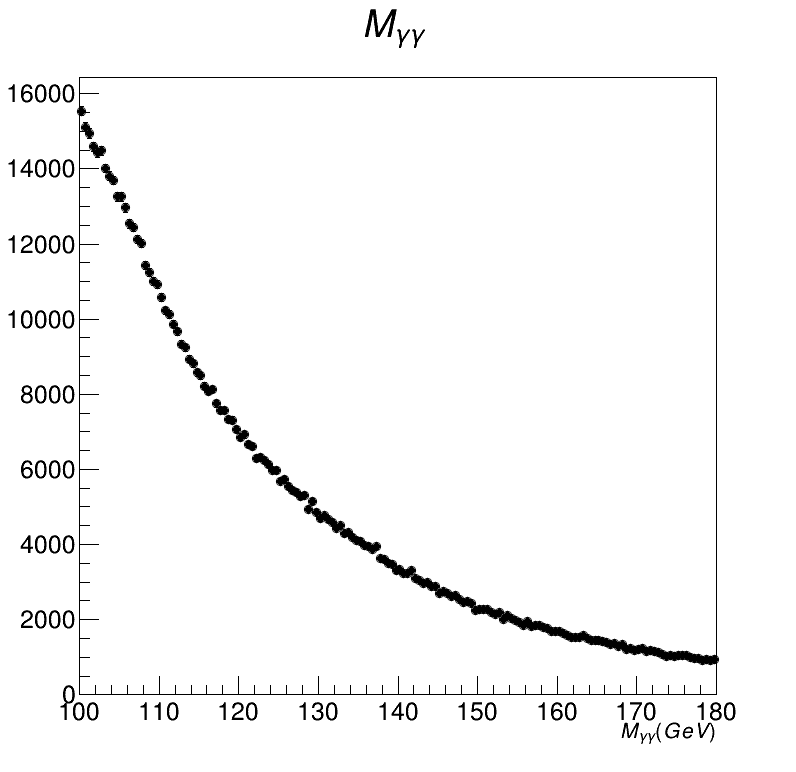

In [82]:
frame3 = m3.frame(r.RooFit.Title("M_{\gamma \gamma}"))
dh3.plotOn(frame3,r.RooFit.Name("dh3"))
c10 = r.TCanvas("c10","example",800,800)
frame3.GetXaxis().SetTitleSize(0.03)
frame3.GetYaxis().SetTitleSize(0.03)
frame3.Draw()
c10.Draw()

In [83]:
nsig = r.RooRealVar("nsig","signal events",10000,0,8000000)                                                       
nbkg = r.RooRealVar("nbkg","background events",1000000,0,2000000)

model = r.RooAddPdf("model", "Total Model", r.RooArgList(bwcball, bkg), r.RooArgList(nsig, nbkg))
a3= model.fitTo(dh3,r.RooFit.Extended(),r.RooFit.Range(100,180), r.RooFit.Save())

[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_dh3) constructing test statistic for sub-range named fit
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x62288d196260 with pdf bw_CONV_cball_CACHE_Obs[m1] for nset () with code 0 from preexisting content.
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name BWxcball_Int[] is already in this set
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (expo1,expo2)
 **********
 **   21 **SET PRINT           1
 **********
 **********
 **   22 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaCB      3.39098e-01  3.30596e+00    1.00000e-01  5.00000e+00
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
     2 lambd1      -2.42759e-02  1.12319e-04   

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.removeStringAttribute("fitrange");
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_dh3'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_dh3'
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x62288d14cc80 with pdf bw_CONV_cball_CACHE_Obs[m1]_NORM_m3 for nset (m3) with code 0
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRa

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file fail.png has been created


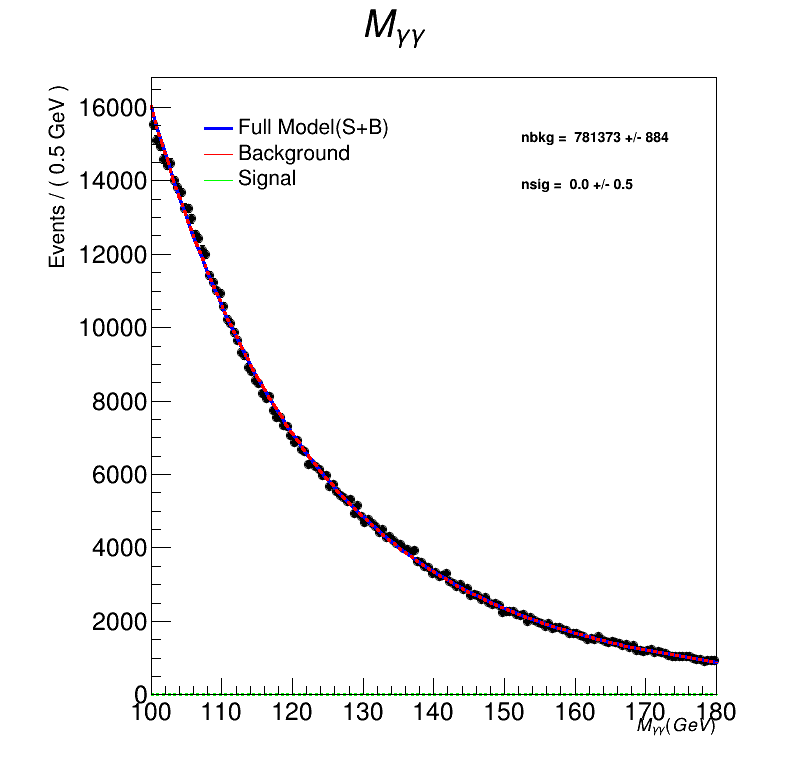

In [84]:
ras_bkgshape = r.RooArgSet(bkg)
ras_bwcball = r.RooArgSet(bwcball)
model.plotOn(frame3,r.RooFit.Name("model"));                                                                            
model.plotOn(frame3,r.RooFit.Components(ras_bkgshape),r.RooFit.LineStyle(r.kDashed),r.RooFit.LineColor(r.kRed)) ;                                                    
model.plotOn(frame3,r.RooFit.Components(ras_bwcball),r.RooFit.LineColor(r.kGreen),r.RooFit.LineStyle(r.kDashed)) ;  
params_to_show = r.RooArgSet(nsig, nbkg)
model.paramOn(frame3, 
              r.RooFit.Layout(0.65,0.75,0.85),  
              r.RooFit.Format("NEU",r.RooFit.AutoPrecision(1)),r.RooFit.Parameters(params_to_show))
frame3.getAttText().SetTextSize(0.02); 
frame3.GetXaxis().SetTitleSize(0.025)
frame3.GetYaxis().SetTitleSize(0.03)
c11 = r.TCanvas("c6","Inv. Mass Hist.",800,800) ;                                                                                                                                                           
r.gPad.SetLeftMargin(0.19) ; frame2.GetYaxis().SetTitleOffset(1.8) ;                                          
r.gPad.SetRightMargin(0.10) ; frame2.GetXaxis().SetTitleOffset(1.2) ;                                         
                                                                                                                
frame3.Draw(); 
legend6 = r.TLegend(0.25, 0.75, 0.45, 0.85)  # Adjust position as needed
dummy_bkg = r.TGraph()
dummy_bkg.SetLineColor(r.kRed)  # Use the same color as in plotOn
dummy_sig = r.TGraph()
dummy_sig.SetLineColor(r.kGreen)
# Add legend entries for each component
legend6.AddEntry(frame3.findObject("model"), "Full Model(S+B)", "l")
legend6.AddEntry(dummy_bkg, "Background", "l")
legend6.AddEntry(dummy_sig, "Signal", "l")

# Customize legend appearance (optional)
legend6.SetBorderSize(0)
legend6.SetFillColor(0)
legend6.SetTextSize(0.03)  # Adjust text size

# Draw the legend
legend6.Draw()

# Update and Save

c11.Draw() 
c11.SaveAs("fail.png")

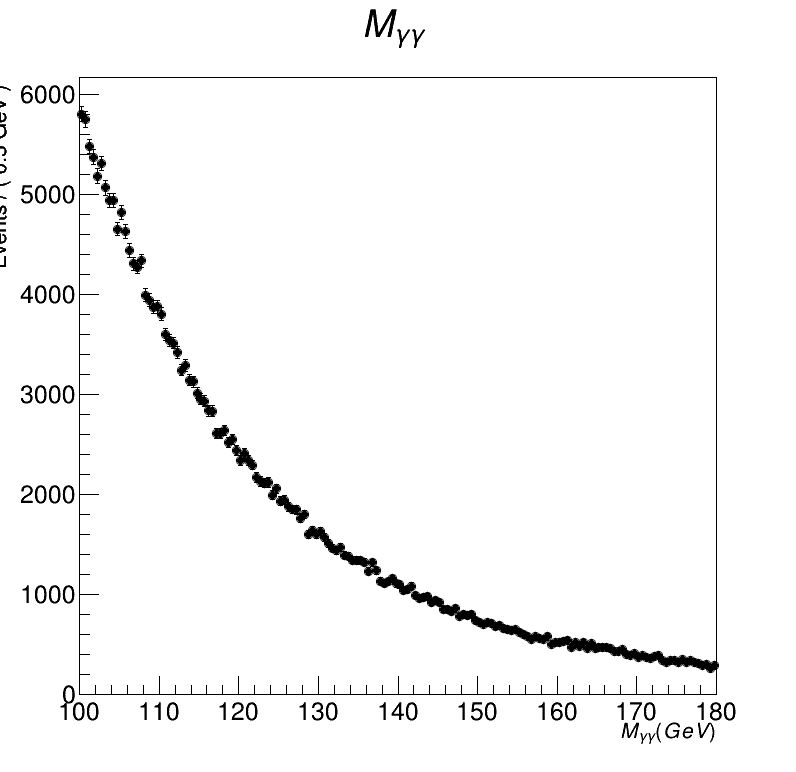

In [8]:
frame4 = m4.frame(r.RooFit.Title("M_{\gamma \gamma}"))
dh4.plotOn(frame4,r.RooFit.Name("dh4"))
c10 = r.TCanvas("c10","example",800,800)
frame4.GetXaxis().SetTitleSize(0.03)
frame4.GetYaxis().SetTitleSize(0.03)
frame4.Draw()
c10.Draw()

In [9]:
mBW = r.RooRealVar("mBW","mean BW",125,110,140)                                                              
sBW = r.RooRealVar("sBW","sigma BW",5,0.0,10)                                                            
brietwigner = r.RooBreitWigner("bw","bw",m4,mBW,sBW)                                                             
                                                                                                                
mCB = r.RooRealVar("mCB", "mCB" ,0.1,0.1,1.0)                                                                       
sCB = r.RooRealVar("sCB", "sCB" ,2.3 , 0.0, 5.0)                                                               
nCB = r.RooRealVar("nCB","nCB", 1,0.,5.0)                                                                        
#RooRealVar nCB("nCB","", 1.42,0.001,50)                                                                    
alphaCB = r.RooRealVar("alphaCB","", 0.93,0.1,5.0)                                                               
#RooRealVar alphaCB("alphaCB","", 0.93,0.1 , 50)                                                            
cball = r.RooCBShape("cball","cball",m4,mCB,sCB, alphaCB, nCB)
bwcball = r.RooFFTConvPdf("BWxcball","BW(X)cball",m4,brietwigner, cball)

[#1] INFO:Caching -- Changing internal binning of variable 'm3' in FFT 'BWxcball' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.


In [10]:
lambd1 = r.RooRealVar("lambd1", "slope", -0.001, -10, 10) 
exp1 = r.RooExponential("expo1", "exponential PDF", m4, lambd1)
nbkg1 = r.RooRealVar("nbkg1","background events",1000000,200,8000000)
lambd2 = r.RooRealVar("lambd2", "slope", 1, -10, 10) 
exp2 = r.RooExponential("expo2", "exponential PDF", m4, lambd2)
nbkg2 = r.RooRealVar("nbkg2","background events",1000000,200,8000000)
bkg  =r.RooAddPdf("bkg", "Total bkg", r.RooArgList(exp1,exp2), r.RooArgList(nbkg1,nbkg2))


In [11]:
nsig = r.RooRealVar("nsig","signal events",10000,0,8000000)                                                       
nbkg = r.RooRealVar("nbkg","background events",1000000,0,2000000)

model = r.RooAddPdf("model", "Total Model", r.RooArgList(bwcball, bkg), r.RooArgList(nsig, nbkg))
a3= model.fitTo(dh4,r.RooFit.Extended(),r.RooFit.Range(100,180), r.RooFit.Save())

[#1] INFO:Eval -- RooRealVar::setRange(m3) new range named 'fit' created with bounds [100,180]
[#1] INFO:Eval -- RooRealVar::setRange(m3) new range named 'fit_nll_model_dh4' created with bounds [100,180]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_dh4) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(m3) new range named 'refrange_fft_BWxcball' created with bounds [100,180]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x5b1116725a20 with pdf bw_CONV_cball_CACHE_Obs[m3]_NORM_m3 for nset (m3) with code 0
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x5b1116743080 with pdf bw_CONV_cball_CACHE_Obs[m3]_NORM_m3 for nset (m3) with code 0 from preexisting content.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (BWxcball,expo1,expo2)
 **